# Volume-weighted T/S Diagram from WOA & Models

In [1]:
from dask.distributed import Client

client = Client("tcp://10.32.52.25:45471")
client

Client Scheduler: tcp://10.32.52.25:45471 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 30 Cores: 60 Memory: 345.00 GB


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
from matplotlib.colors import LogNorm
import gsw
from fastjmd95 import jmd95numba

In [3]:
xr.set_options(display_style='text')

In [4]:
woa_8110 = xr.open_dataarray('/home/jovyan/WMT/WOA/ts_hist_8110.nc')
woa_0517 = xr.open_dataarray('/home/jovyan/WMT/WOA/ts_hist_0517.nc')
ecco = xr.open_dataarray('/home/jovyan/WMT/ECCO-budgets/ts_hist_mean_ECCO.nc')
sose = xr.open_dataarray('/home/jovyan/WMT/SOSE-budgets/ts_hist_mean_SOSE.nc')

In [5]:
sigma2_8110 = jmd95numba.rho(woa_8110.salt_bin, woa_8110.theta_bin, 2000.)
sigma2_0517 = jmd95numba.rho(woa_0517.salt_bin, woa_0517.theta_bin, 2000.)
sigma2_sose = jmd95numba.rho(sose.salt_bin, sose.theta_bin, 2000.)
sigma2_ecco = jmd95numba.rho(ecco.salt_bin, ecco.theta_bin, 2000.)

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


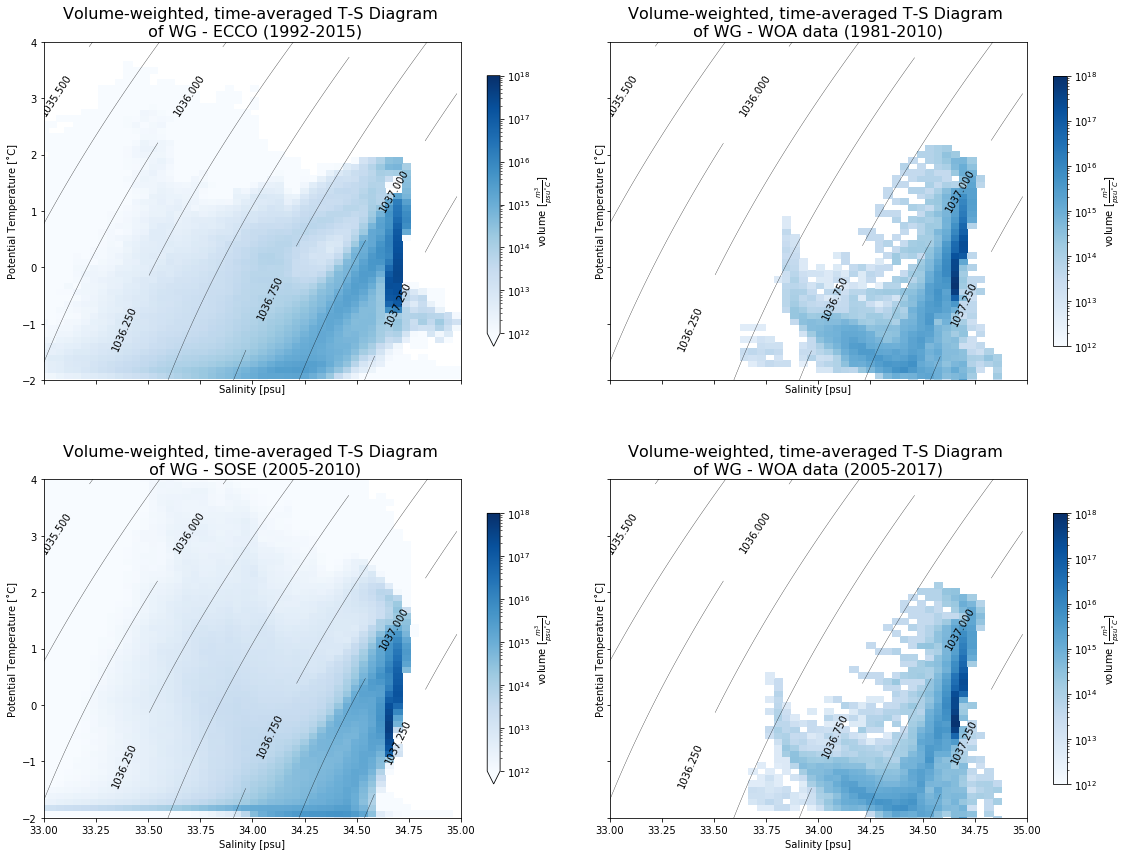

In [6]:
fig, axes = plt.subplots(2,2, figsize=(16,12), sharex=True, sharey=True)

sigma_levs = np.arange(1032, 1037.5, 0.25)

C0 = sigma2_ecco.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=axes[0,0])
plt.clabel(C0)
ecco.where(ecco>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[0,0])

axes[0,0].set_xlabel('Salinity [psu]')
axes[0,0].set_ylabel('Potential Temperature [˚C]')
axes[0,0].set_title('Volume-weighted, time-averaged T-S Diagram \n of WG - ECCO (1992-2015)', fontsize=16)

C1 = sigma2_sose.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=axes[1,0])
plt.clabel(C1)
sose.where(sose>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[1,0])
axes[1,0].set_xlabel('Salinity [psu]')
axes[1,0].set_ylabel('Potential Temperature [˚C]')
axes[1,0].set_title('Volume-weighted, time-averaged T-S Diagram \n of WG - SOSE (2005-2010)', fontsize=16)

C2 = sigma2_8110.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=axes[0,1])
plt.clabel(C2)
woa_8110.where(woa_8110>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                                cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[0,1])
axes[0,1].set_xlabel('Salinity [psu]')
axes[0,1].set_ylabel('Potential Temperature [˚C]')
axes[0,1].set_title('Volume-weighted, time-averaged T-S Diagram \n of WG - WOA data (1981-2010) ', fontsize=16)

C3 = sigma2_0517.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=axes[1,1])
plt.clabel(C3)
woa_0517.where(woa_0517>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                                cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[1,1])
axes[1,1].set_xlabel('Salinity [psu]')
axes[1,1].set_ylabel('Potential Temperature [˚C]')
axes[1,1].set_title('Volume-weighted, time-averaged T-S Diagram \n of WG - WOA data (2005-2017) ', fontsize=16)

plt.tight_layout(h_pad=5)
plt.xlim(33, 35)
plt.ylim(-2, 4);

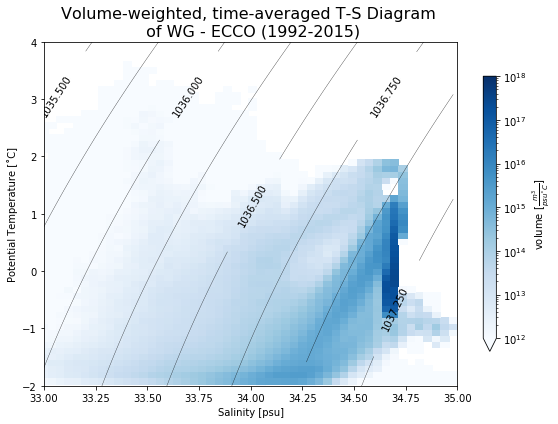

In [23]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
sigma_levs = np.arange(1032, 1037.5, 0.25)

C0 = sigma2_ecco.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs)
plt.clabel(C0)
ecco.where(ecco>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})
axes.set_xlabel('Salinity [psu]')
axes.set_ylabel('Potential Temperature [˚C]')
axes.set_title('Volume-weighted, time-averaged T-S Diagram \n of WG - ECCO (1992-2015)', fontsize=16)

plt.tight_layout(h_pad=5)
plt.xlim(33, 35)
plt.ylim(-2, 4);

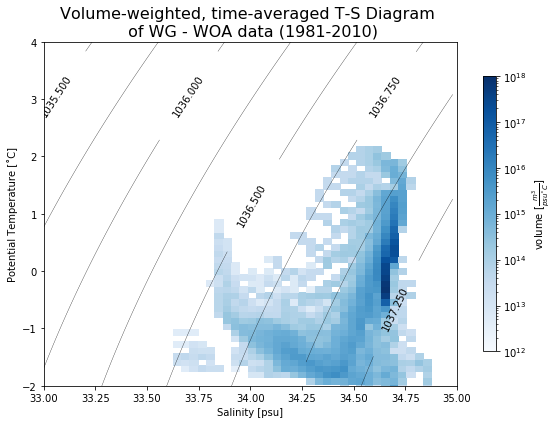

In [24]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
sigma_levs = np.arange(1032, 1037.5, 0.25)

C2 = sigma2_8110.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs)
plt.clabel(C2)
woa_8110.where(woa_8110>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                                cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})
axes.set_xlabel('Salinity [psu]')
axes.set_ylabel('Potential Temperature [˚C]')
axes.set_title('Volume-weighted, time-averaged T-S Diagram \n of WG - WOA data (1981-2010)', fontsize=16)

plt.tight_layout(h_pad=5)
plt.xlim(33, 35)
plt.ylim(-2, 4);

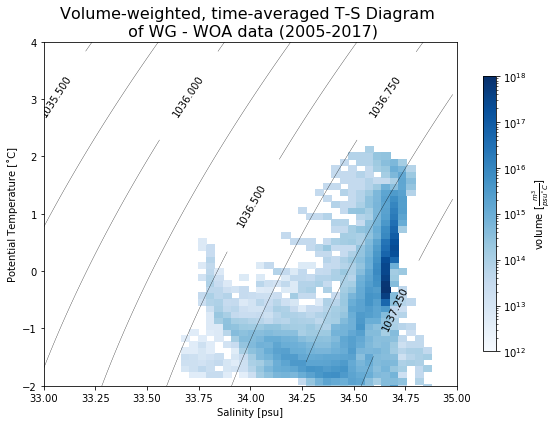

In [25]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
sigma_levs = np.arange(1032, 1037.5, 0.25)

C3 = sigma2_0517.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs)
plt.clabel(C3)
woa_0517.where(woa_0517>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                                cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})
axes.set_xlabel('Salinity [psu]')
axes.set_ylabel('Potential Temperature [˚C]')
axes.set_title('Volume-weighted, time-averaged T-S Diagram \n of WG - WOA data (2005-2017)', fontsize=16)

plt.tight_layout(h_pad=5)
plt.xlim(33, 35)
plt.ylim(-2, 4);